In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<function matplotlib.pyplot.show(*args, **kw)>

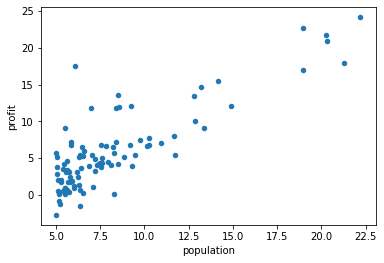

In [20]:
data.plot.scatter('population','profit')
plt.show

In [21]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [25]:
X = data.iloc[:,0:-1]

X.shape


(97, 2)

In [30]:
y = data.iloc[:,-1]
y.shape

(97,)

In [35]:
X = np.array(X)
X.shape


(97, 2)

In [37]:
y = np.array(y)
y.shape

(97,)

In [39]:
y = y.reshape(97,1)
y.shape

(97, 1)

In [44]:
m = len(X)
def costFunction(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return np.sum(inner)/(2*m)

theta = np.zeros((X.shape[-1],y.shape[-1]))
cost_init = costFunction(X,y,theta)
cost_init

32.072733877455676

In [67]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    for i in range(iters):
        theta = theta - (X.T @ ( X@theta - y ))* alpha / m
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 100 ==0:
            print(cost)
            
    return theta,costs

alpha = 0.02
iters = 1500
theta,costs = gradientDescent(X,y,theta,alpha,iters)

4.476971379363706
4.4769713776206945
4.476971376774265
4.476971376363225
4.47697137616362
4.476971376066689
4.476971376019617
4.476971375996759
4.476971375985657
4.476971375980268
4.47697137597765
4.476971375976379
4.476971375975761
4.476971375975461
4.4769713759753165


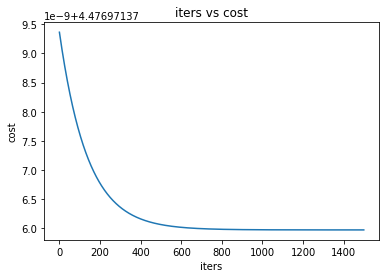

In [68]:
fig,ax= plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel = 'iters',ylabel = 'cost', title = 'iters vs cost')
plt.show()

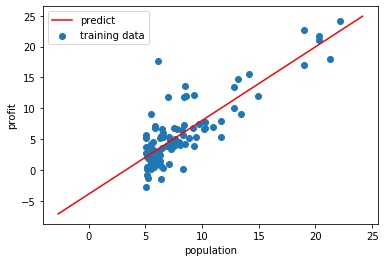

In [69]:
x = np.linspace(y.min(),y.max(),100)
y_ = theta[0,0] + theta[1,0] * x
fig,ax = plt.subplots()
ax.scatter(X[:,-1],y,label = 'training data')
ax.plot(x,y_,'r',label = 'predict')
ax.legend()
ax.set(xlabel='population',ylabel = 'profit')
plt.show()